# TASK : 01
    
    Exploratory Data Analysis On "Global Terrorism Dataset"
    
    Problem Statement : As a Security/Defense Analyst, try to find out the hot zone of terrorism.
    
    Name : Rahat Qayyum

In [2]:
#Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the file

data = pd.read_csv("globalterrorism.csv", encoding='latin1')


In [4]:
#Understanding the data

data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# let's see how many rows and columns are there in the dataset.



In [5]:
print("There are {} rows and {} columns in this dataset".format(data.shape[0], data.shape[1]))

There are 181691 rows and 135 columns in this dataset


# Now let's see the total columns and their names in the dataset.

In [6]:
data.columns.to_numpy()

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

# Let's see how many unique columns this dataset contains.

In [7]:
unique_columns = data.columns.nunique()
print("There are total %d unique columns in the data" %unique_columns)


There are total 135 unique columns in the data


# We will use the following columns for the Analysis :
    1. Year
    2. Month
    3. Day
    4. Country
    5. Region
    6. State
    7. City
    8. Attack Type
    9. Target Type
    10. Target subtype
    11. Gang name
    12. Weapon type 
    
    

# Renaming the above mentioned columns. 

In [8]:
data = data.rename(columns =
                  {
                      'iyear' : 'Year',
                      'imonth' : 'Month',
                      'iday' : 'Day',
                      'country_txt' : 'Country',
                      'region_txt' : 'Region',
                      'provstate' : 'State',
                      'city' : 'City',
                      'attacktype1_txt' : 'Attack_Type',
                      'targtype1_txt' : 'Target_Type',
                      'targsubtype1_txt' : 'Target_subtype',
                      'gname' : 'Gang_Name',
                      'weaptype1_txt' : 'Weapon_type'
                      
                  })

data

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# As you can see in the data, there are a lot of NaN values. Let's fill these NaN values with 'Others' and 'Unknown'

In [9]:
data['Target_subtype'] = data['Target_subtype'].fillna('Others')

# Filling the NaN values in state column as Unknown

data['State'] = data['State'].fillna('Unknown')

# Filling the NaN values in city column as Unknown

data['City'] = data['City'].fillna('Unknown')

data.replace( {"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)


In [10]:
data

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Checking how many columns are left with NaN values so that we can drop it.

In [13]:
s = data.isnull().apply(sum, axis=0)
print(s.to_numpy())

[     0      0      0      0 172452      0 179471      0      0      0
      0      0      0   4556   4557      6      0 126196  66129      0
      0      0      1 152680 152680      1      0      0      0      0
 175377 175377 181263 181263      0      0  10373      0  42550    636
   1559   1559 170547 170547 171006 171006 171574 170671 170863 170863
 180515 180515 180594 180594 180665 180516 180544 180544      0 175801
 179678 181531 181367 181671 131130    380 179736 181371      0  71115
  69489  66120 162608 162608 179801 181075 181075 181373 181558 181558
 176852      0      0  20768  20768 168564 168564 170149 170149 179828
 179828 179998 179998 181618 181618 181621 181621  67670  10313  64446
  66958  16311  64702  69143      0 117626 117626 142702 123732    178
 168119 168174 177628 173567 181367 178386 104310 180341 181128 180917
 181139 181177 170700 170700 171291 153402  66191 104758 138175      0
      0      0      0      0 156653]


In [14]:
for col in data:
    if s[col] >= 1:
        del data[col]

In [15]:
print(data.isnull().sum())

eventid           0
Year              0
Month             0
Day               0
extended          0
country           0
Country           0
region            0
Region            0
State             0
City              0
vicinity          0
crit1             0
crit2             0
crit3             0
success           0
suicide           0
attacktype1       0
Attack_Type       0
targtype1         0
Target_Type       0
Target_subtype    0
Gang_Name         0
individual        0
weaptype1         0
Weapon_type       0
property          0
dbsource          0
INT_LOG           0
INT_IDEO          0
INT_MISC          0
INT_ANY           0
dtype: int64


# Let's check the shape

In [72]:
data.shape

(181691, 13)

# Let's look at the unique value of the columns now

In [17]:
data.columns.unique()

Index(['eventid', 'Year', 'Month', 'Day', 'extended', 'country', 'Country',
       'region', 'Region', 'State', 'City', 'vicinity', 'crit1', 'crit2',
       'crit3', 'success', 'suicide', 'attacktype1', 'Attack_Type',
       'targtype1', 'Target_Type', 'Target_subtype', 'Gang_Name', 'individual',
       'weaptype1', 'Weapon_type', 'property', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

# Number of countries in the dataset

In [18]:
total_countries = data['Country'].nunique()
print("There are total %d countries in the dataset" %total_countries)

There are total 205 countries in the dataset


# Number of Regions in the dataset

In [19]:
total_regions = data['Region'].nunique()
print("There are %d regions in the dataset" %total_regions)

There are 12 regions in the dataset


# Basic Statistics

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   eventid         181691 non-null  int64 
 1   Year            181691 non-null  int64 
 2   Month           181691 non-null  int64 
 3   Day             181691 non-null  int64 
 4   extended        181691 non-null  int64 
 5   country         181691 non-null  int64 
 6   Country         181691 non-null  object
 7   region          181691 non-null  int64 
 8   Region          181691 non-null  object
 9   State           181691 non-null  object
 10  City            181691 non-null  object
 11  vicinity        181691 non-null  int64 
 12  crit1           181691 non-null  int64 
 13  crit2           181691 non-null  int64 
 14  crit3           181691 non-null  int64 
 15  success         181691 non-null  int64 
 16  suicide         181691 non-null  int64 
 17  attacktype1     181691 non-nu

# Top 10 Countries 

In [48]:
data['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

# Top 10 Regions

In [51]:
data['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

# Top 10 States

In [55]:
data['State'].value_counts().head(10)

Baghdad               7645
Unknown               4711
Northern Ireland      4498
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

# Attack types

In [58]:
data['Attack_Type'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack_Type, dtype: int64

# Target Types

In [59]:
data['Target_Type'].value_counts().head(10)

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: Target_Type, dtype: int64

# Top 10 Gangs that were involved.

In [60]:
data['Gang_Name'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Gang_Name, dtype: int64

# Top 10 Weapons that were used.

In [61]:
data['Weapon_type'].value_counts().head(10)

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Name: Weapon_type, dtype: int64

# Now let us find out the hot zones of attack through visualization.

<AxesSubplot:xlabel='Weapon_type', ylabel='count'>

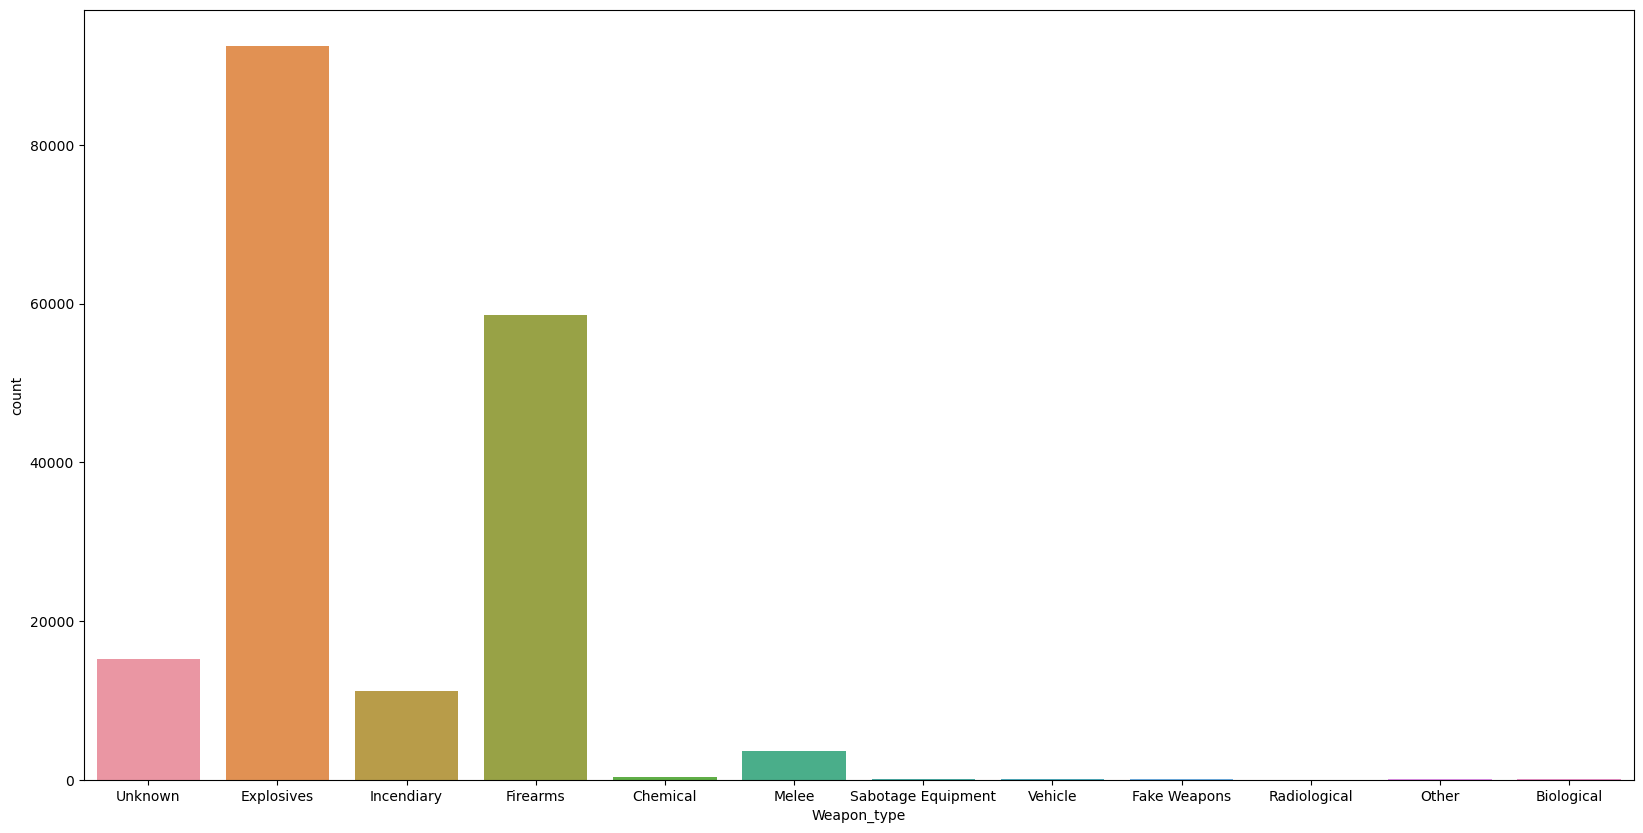

In [67]:
plt.figure(figsize=(20,10))
sns.countplot(x=data.Weapon_type)

Most of the attacks had done through 'Explosives' and 'Firearms'

<AxesSubplot:title={'center':'Attacks By Year'}, xlabel='Year', ylabel='count'>

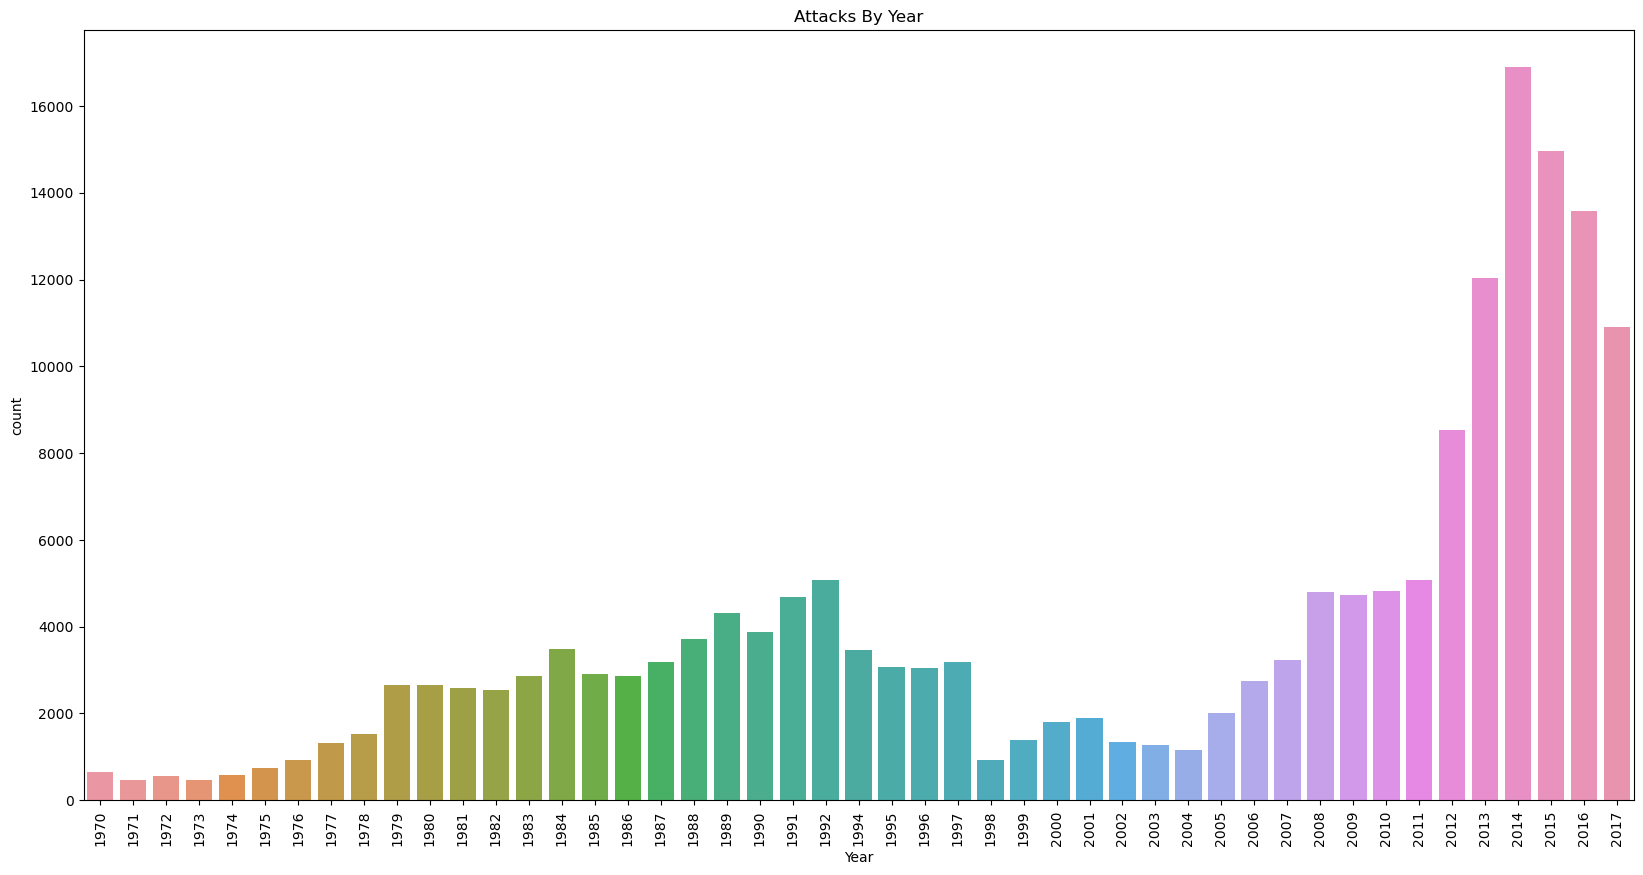

In [69]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Attacks By Year')
sns.countplot(x=data.Year)

Attacks were more during the year 2014, 2015, 2016.

# Let's find out the Target type through Visualization.

<AxesSubplot:title={'center':'Target Type'}, xlabel='Target_Type', ylabel='count'>

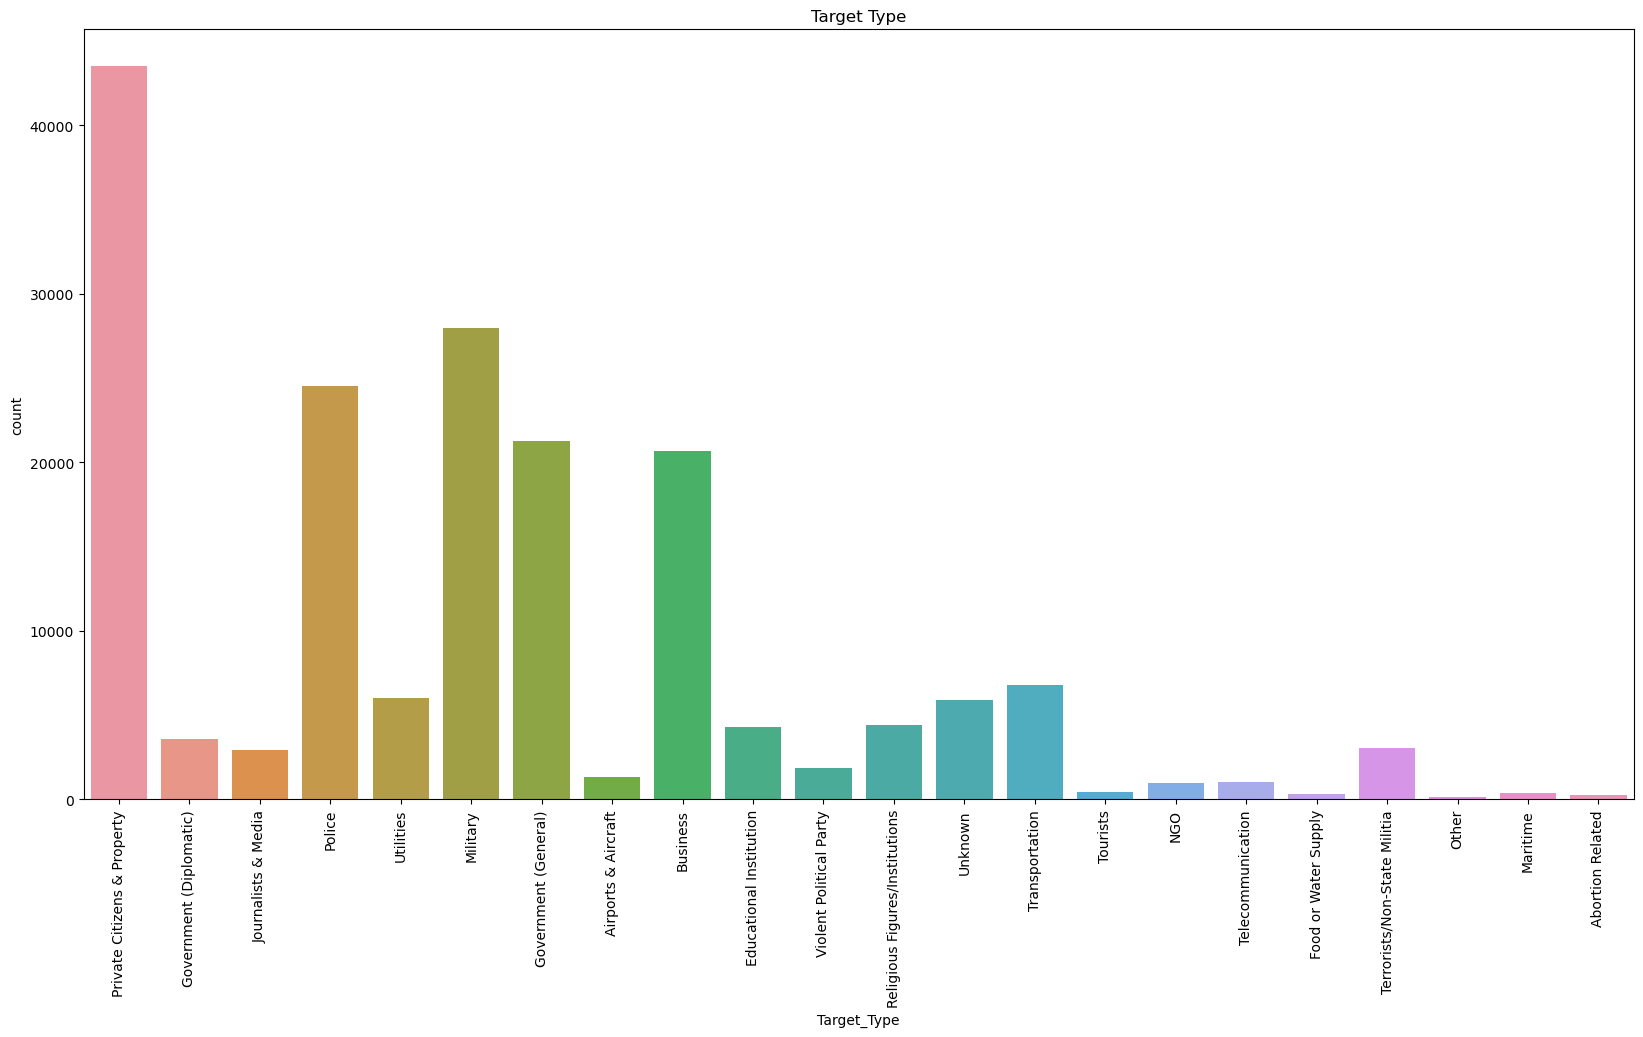

In [71]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Target Type')
sns.countplot(x=data.Target_Type)

Therefore the main Target type are the Private Citizens and Property then Military then Police.